In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load datasets
red_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
white_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
red_wine = pd.read_csv(red_wine_url, delimiter=';')
white_wine = pd.read_csv(white_wine_url, delimiter=';')

In [3]:
# Data preparation
wine_data = pd.concat([red_wine.assign(kind='red'), white_wine.assign(kind='white')])
wine_data['kind'] = wine_data['kind'].map({'red': 1, 'white': 0})
wine_data.drop_duplicates(inplace=True)
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x > 5 else 0)

In [4]:
# Split the data
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


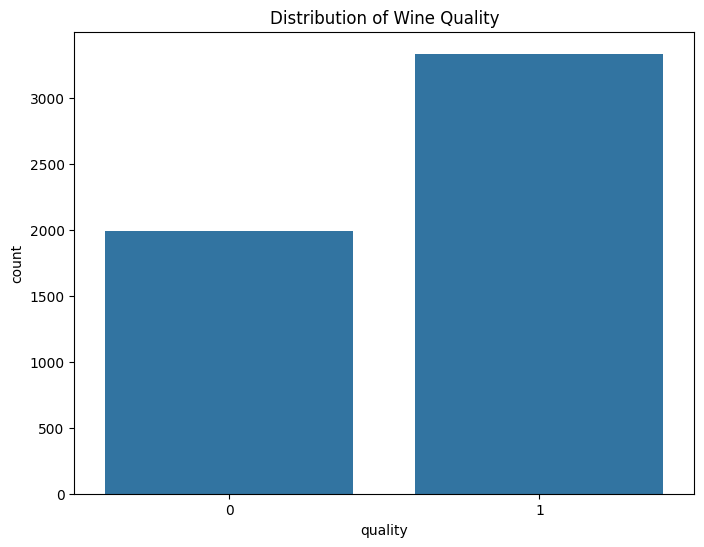

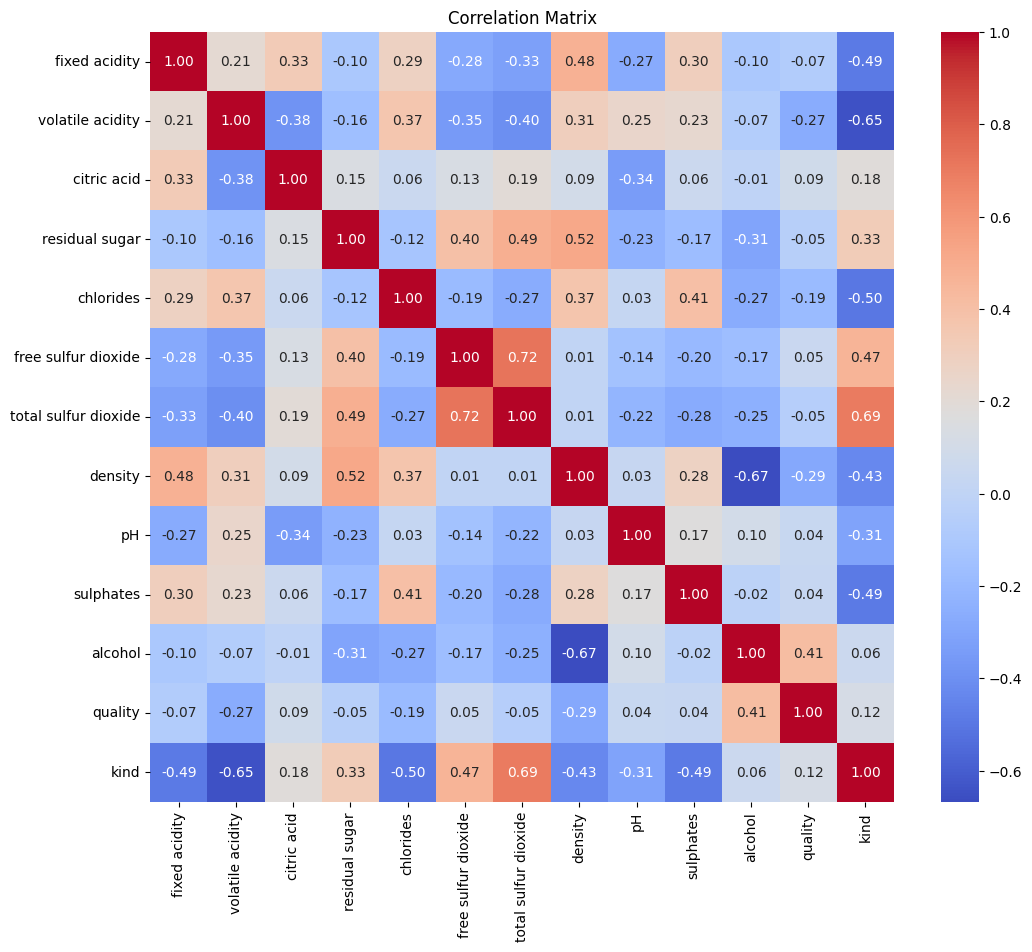

In [6]:
# Exploratory Data Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(wine_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Model selection and hyperparameter tuning
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

param_grid_gb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_

RandomForest Accuracy: 0.7800751879699248
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       403
           1       0.81      0.85      0.83       661

    accuracy                           0.78      1064
   macro avg       0.77      0.76      0.76      1064
weighted avg       0.78      0.78      0.78      1064

GradientBoosting Accuracy: 0.7697368421052632
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       403
           1       0.80      0.84      0.82       661

    accuracy                           0.77      1064
   macro avg       0.76      0.75      0.75      1064
weighted avg       0.77      0.77      0.77      1064

SVC Accuracy: 0.7697368421052632
              precision    recall  f1-score   support

           0       0.71      0.66      0.68       403
           1       0.80      0.84      0.82       661

    accuracy                           0.77      1064
   macr

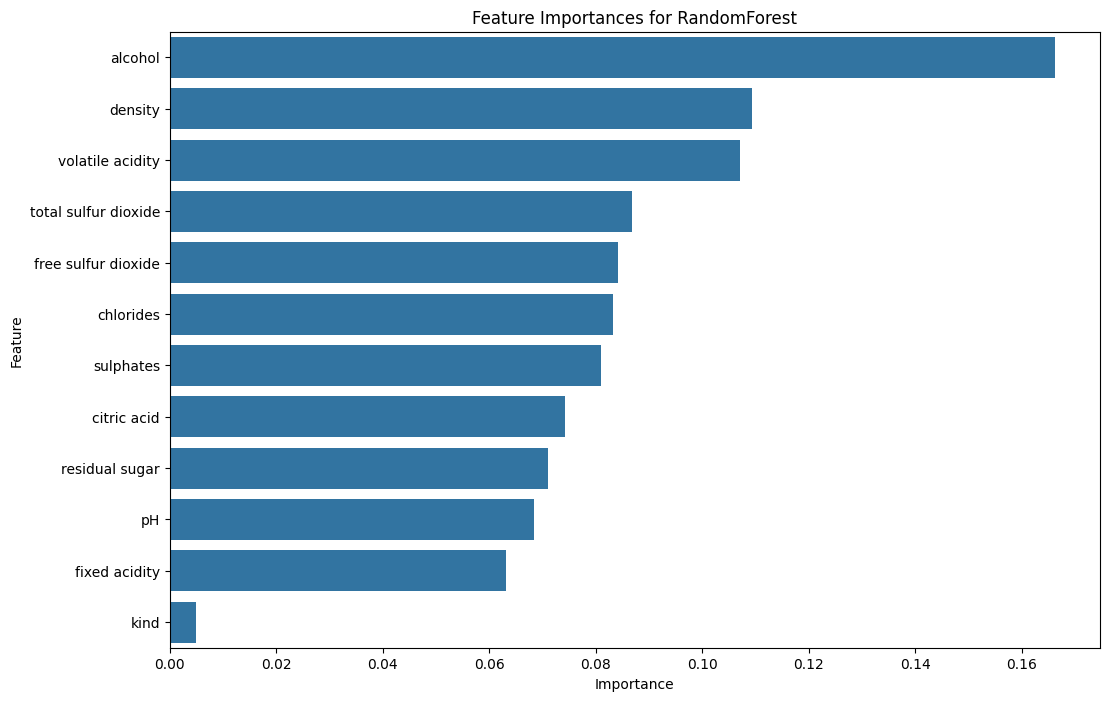

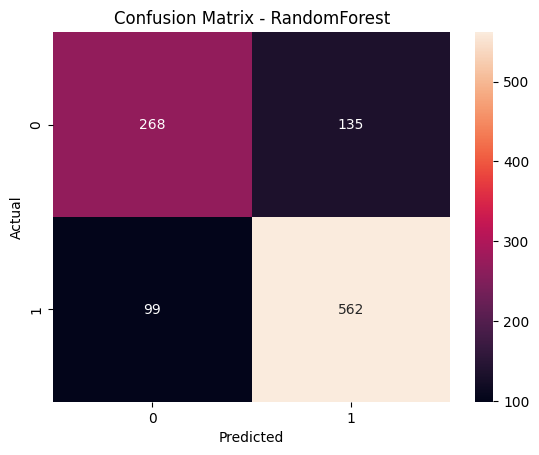

The best model is RandomForest with an accuracy of 0.7800751879699248


In [8]:
# Model analysis
best_models = {
    'RandomForest': best_rf,
    'GradientBoosting': best_gb,
    'SVC': models['SVC'],
    'LogisticRegression': models['LogisticRegression']
}

for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))

feature_importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(importance_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances for RandomForest')
plt.show()

best_model_name = max(best_models, key=lambda name: accuracy_score(y_test, best_models[name].predict(X_test)))
best_model = best_models[best_model_name]
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

print(f"The best model is {best_model_name} with an accuracy of {accuracy_score(y_test, y_pred_best)}")